# ***PREDICCIÓN DE ACTOS DELICTIVOS - CHICAGO***

## Alumnos:

### `Noelia García`

### `Carlos Astorga`

### `Ramón Denia`

# ***ANÁLISIS EXPLORATORIO DE LOS DATOS***

---

## ***CARGA DE DATOS***

---

Importación de las librerias necesarias para realizar la predicción y analisis de las variables. Estas librerias se han ido nutriendo segun avanzaba el codigo

In [2]:
#pip install tensorflow

In [3]:
#Librerias
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import calendar


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from datetime import datetime
import time
from time import sleep
%matplotlib inline
plt.style.use('seaborn')

from numpy import arange
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

Cargar los datos con los que se cuenta y crear la variable "dataset" que engloba todos los datos.

In [4]:
dataset = pd.read_csv ('DATASET CHICAGO.csv', low_memory = False, encoding="ISO-8859-1")
#Hemos hecho un low_memory=False, porque nos daba problemas a la hora de interpretar el tipo de datos de algunas filas

## ***ANALISIS EXPLORATORIO***

---

A continuación, se llevara a cabo un analisis exploratorio de los datos y variables que contiene nuestro dataset, con la intención de entenderlo mejor. Este paso, es bastante relevante.

In [5]:
# Mostramos el número de observaciones y el tamaño del dataset:
print(f"Número de observaciones: {dataset.shape[0]}")
print(f"Tamaño {dataset.shape}")

# Mostramos en pantalla las primeras 5 filas del dataset para ver su aspecto:
dataset.head(5)

Número de observaciones: 6954967
Tamaño (6954967, 30)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11807717,JC408714,08/26/2019 11:58:00 PM,060XX S JUSTINE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,...,-87.663123,"(41.784305722, -87.663123342)",44.0,22257.0,65.0,277.0,2.0,23.0,17.0,266.0
1,11807826,JC408716,08/26/2019 11:57:00 PM,012XX N LA SALLE DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,-87.632948,"(41.904653619, -87.6329484)",51.0,14926.0,37.0,17.0,11.0,54.0,14.0,198.0
2,11807746,JC408370,08/26/2019 11:56:00 PM,065XX S PROMONTORY DR,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,PARK PROPERTY,True,False,...,-87.570448,"(41.776400433, -87.570448042)",32.0,22538.0,9.0,134.0,33.0,24.0,18.0,262.0
3,11807718,JC408708,08/26/2019 11:55:00 PM,079XX S ELLIS AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,-87.600314,"(41.750491135, -87.600314257)",9.0,21546.0,40.0,247.0,35.0,61.0,20.0,227.0
4,11807777,JC408706,08/26/2019 11:45:00 PM,062XX W 64TH PL,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,False,False,...,-87.776884,"(41.775028096, -87.776883531)",23.0,22268.0,62.0,266.0,6.0,7.0,13.0,272.0


### CONTENIDO DEL DATASET



ID - Identificador único para el registro.

Case Number-  Numero del departamento de policia de chicago. Es diferente para delito.

Date - Fecha cuando ocurre el incidente.

Block - La dirección donde ocurre el incidente.

IUCR - Codigo del crimen. Relacionado con Primary Type.

Primary Type - Descripcion del codigo del crimen.

Description - Descripcion mas detalla sobre Primary Type.

Location Description - Localizacion donde ocurre el incidente.

Arrest - Indica si se llevo a cabo un arresto por la policia.

Domestic - Indica si el incidente estuvo relacionado con el hogar.

Beat - Indica el sector policial que atendieron el incidente. En chicago existen 22.

District - Distrito donde ocurre el incidente

Ward - El barrio donde ocurre el incidente.

Community Area - Indica el area donde ocurre el incidente. Chicago tiene aproximadamente 77 areas.

FBI Code - Indica la clasificación del delito como se describe en  (NIBRS) del FBI.

X Coordinate - Coordenadas  X, donde ocurre el incidente.

Y Coordinate - Coordenadas Y,  donde ocurre el incidente.

Year - El año donde ocurre el incidente.

Updated On - La ultima actualizacion de la información.

Latitude - La latitud donde ocurre el incidente

Longitude - La longitud donde ocurre el incidente

Location - Localizacion donde ocurre los hechos para representacion de mapas.

Historical Wards 2003-2015 - Los barrios históricos entre el 2003 y 2015

Zip Codes - Códigos Postales

Community Areas - Areas por comunidad dentro de los distritos de Chicago

Cesnsus Tracts - Registros del Censo de la población

Wards - Barrios donde se encuentra el crimen (repetido en el dataset)

Boundaries ZIP Codes - Codigos Postales fronterizos de las areas colindantes

Police Districts - Distritos Policiales

Police Beats - Sectores Policiales

In [6]:
dataset.columns
#Imprimimos las columnas.Con esto nos aseguramos que todas han sido correctamente cargadas y además podemos ver si tienen algún tipo de falta para no tener problemas en el futuro al buscarlas.

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

In [7]:
dataset.dtypes
#mostramos los tipos de datos de datos que contiene cada variable asegurándonos de que el tipo de dato sea el adecuado para cada variable.

ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                      float64
Ward                          float64
Community Area                float64
FBI Code                       object
X Coordinate                  float64
Y Coordinate                  float64
Year                            int64
Updated On                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards       

Text(0,0.5,'Data type')

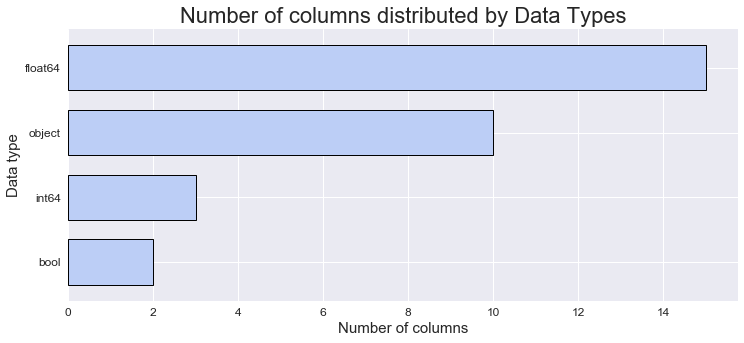

In [8]:
width=0.7

dataset.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(12,5),fontsize=12,
                                                color='#BCCEF6',width=width, linewidth=1,edgecolor='0')
plt.title('Number of columns distributed by Data Types',fontsize=22,fontstyle='normal')
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

#Visualizamos los tipos de datos

In [9]:
#Numero de nulos que contiene nuestros datos.

datos = pd.DataFrame({'Count': dataset.isnull().sum(), 'Percent': 100*dataset.isnull().sum()/len(dataset)})

datos[datos['Count'] > 0]

,Count,Percent
Case Number,4,0.000058
Location Description,5451,0.078376
District,47,0.000676
Ward,614826,8.840099
Community Area,613495,8.820962
X Coordinate,65971,0.948545
Y Coordinate,65971,0.948545
Latitude,65971,0.948545
Longitude,65971,0.948545
Location,65971,0.948545


In [11]:
#Muestra analisis estadisticos clave para ver la funcionalidad de las variables. Es el primer análisis estadistico por encima que se suele aplicar.
dataset.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,6.954967e+06,6.954967e+06,6.954920e+06,6.340141e+06,6.341472e+06,6.888996e+06,6.888996e+06,6.954967e+06,6.888996e+06,6.888996e+06,6.868991e+06,6.888996e+06,6.871739e+06,6.873879e+06,6.871851e+06,6.871786e+06,6.872818e+06,6.872841e+06
mean,6.386478e+06,1.190291e+03,1.129838e+01,2.269863e+01,3.756348e+01,1.164532e+06,1.885732e+06,2.008632e+03,4.184204e+01,-8.767175e+01,2.738511e+01,1.910608e+04,3.872534e+01,3.813695e+02,2.554174e+01,3.146683e+01,1.492156e+01,1.504949e+02
std,3.132941e+06,7.032392e+02,6.945786e+00,1.383482e+01,2.153719e+01,1.714886e+04,3.267784e+04,5.245049e+00,8.992012e-02,6.206444e-02,1.526510e+01,5.737959e+03,2.009092e+01,2.300848e+02,1.477255e+01,1.914190e+01,6.452140e+00,7.849090e+01
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.493563e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152941e+06,1.859185e+06,2.004000e+03,4.176890e+01,-8.771383e+01,1.400000e+01,2.118400e+04,2.500000e+01,1.760000e+02,1.200000e+01,1.500000e+01,1.000000e+01,8.300000e+01
50%,6.373471e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166016e+06,1.890626e+06,2.008000e+03,4.185566e+01,-8.766612e+01,2.700000e+01,2.156000e+04,3.700000e+01,3.780000e+02,2.600000e+01,3.000000e+01,1.600000e+01,1.530000e+02
75%,9.096070e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176352e+06,1.909277e+06,2.013000e+03,4.190679e+01,-8.762833e+01,4.100000e+01,2.224300e+04,5.800000e+01,5.770000e+02,3.700000e+01,5.000000e+01,2.000000e+01,2.210000e+02
max,1.181476e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.019000e+03,4.202291e+01,-8.752453e+01,5.300000e+01,2.691200e+04,7.700000e+01,8.010000e+02,5.000000e+01,6.100000e+01,2.500000e+01,2.770000e+02


In [12]:
#Informacion detallada de las variables
dataset.info

<bound method DataFrame.info of                ID Case Number                    Date                  Block  \
0        11807717    JC408714  08/26/2019 11:58:00 PM     060XX S JUSTINE ST   
1        11807826    JC408716  08/26/2019 11:57:00 PM    012XX N LA SALLE DR   
2        11807746    JC408370  08/26/2019 11:56:00 PM  065XX S PROMONTORY DR   
3        11807718    JC408708  08/26/2019 11:55:00 PM      079XX S ELLIS AVE   
4        11807777    JC408706  08/26/2019 11:45:00 PM        062XX W 64TH PL   
...           ...         ...                     ...                    ...   
6954962   8339048    HT572662  01/01/2001 12:00:00 AM      049XX W QUINCY ST   
6954963   9754968    HX403526  01/01/2001 12:00:00 AM   031XX W DOUGLAS BLVD   
6954964   9754973    HX403527  01/01/2001 12:00:00 AM   031XX W DOUGLAS BLVD   
6954965   9755066    HX403532  01/01/2001 12:00:00 AM   031XX W DOUGLAS BLVD   
6954966   9755072    HX403533  01/01/2001 12:00:00 AM   031XX W DOUGLAS BLVD   

       

In [13]:
from pandas import set_option
set_option('precision', 2)
print(dataset.corr(method='pearson'))

#Matriz de correlacioón, para visualizar que variables tienen mas o menos relación

                                  ID    Arrest  Domestic  Beat  District  \
ID                          1.00e+00 -6.01e-02  4.58e-02 -0.04 -4.83e-03   
Arrest                     -6.01e-02  1.00e+00 -6.88e-02 -0.02 -1.73e-02   
Domestic                    4.58e-02 -6.88e-02  1.00e+00 -0.04 -3.90e-02   
Beat                       -3.69e-02 -1.64e-02 -4.22e-02  1.00  9.40e-01   
District                   -4.83e-03 -1.73e-02 -3.90e-02  0.94  1.00e+00   
Ward                        1.99e-02 -1.77e-02 -5.28e-02  0.64  6.88e-01   
Community Area             -9.65e-03 -3.28e-03  7.54e-02 -0.50 -4.95e-01   
X Coordinate                2.66e-03 -3.10e-02  5.87e-03 -0.48 -5.30e-01   
Y Coordinate               -2.70e-03  8.40e-04 -7.69e-02  0.61  6.20e-01   
Year                        9.88e-01 -6.03e-02  4.76e-02 -0.04 -6.11e-03   
Latitude                   -2.69e-03  9.59e-04 -7.67e-02  0.61  6.20e-01   
Longitude                   2.61e-03 -3.13e-02  4.73e-03 -0.47 -5.28e-01   
Historical W

In [14]:
dataset['Primary Type'].unique()

#Muestra los valores unicos de "Primary Type"

array(['ASSAULT', 'BATTERY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'NARCOTICS', 'CRIMINAL TRESPASS',
       'OTHER OFFENSE', 'THEFT', 'BURGLARY', 'PROSTITUTION',
       'OFFENSE INVOLVING CHILDREN', 'INTIMIDATION', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'STALKING',
       'SEX OFFENSE', 'HUMAN TRAFFICKING', 'HOMICIDE',
       'CRIM SEXUAL ASSAULT', 'CONCEALED CARRY LICENSE VIOLATION',
       'PUBLIC PEACE VIOLATION', 'ARSON', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'GAMBLING', 'PUBLIC INDECENCY',
       'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [15]:
dataset['Primary Type'].value_counts()

#Con esto contamos en número de valores de cada variable dentro de "Primary Type"
#Muestran que la mayoria de crimenes son de tipo THEFT 

THEFT                                1467228
BATTERY                              1271442
CRIMINAL DAMAGE                       792562
NARCOTICS                             722358
ASSAULT                               434816
OTHER OFFENSE                         432147
BURGLARY                              395664
MOTOR VEHICLE THEFT                   321573
DECEPTIVE PRACTICE                    278304
ROBBERY                               262059
CRIMINAL TRESPASS                     198695
WEAPONS VIOLATION                      75629
PROSTITUTION                           68886
PUBLIC PEACE VIOLATION                 49011
OFFENSE INVOLVING CHILDREN             47375
CRIM SEXUAL ASSAULT                    28549
SEX OFFENSE                            26160
INTERFERENCE WITH PUBLIC OFFICER       16356
GAMBLING                               14525
LIQUOR LAW VIOLATION                   14233
ARSON                                  11439
HOMICIDE                                9858
KIDNAPPING

In [16]:
dataset['Location Description'].value_counts()

#Aquí pasa exactamente lo mismo, contamos el número de valoresque tiene cada valor unico de la variable "Location Description"
#La mayoria de crimenes se comete en la STREET

STREET                   1815787
RESIDENCE                1177441
APARTMENT                 725399
SIDEWALK                  681122
OTHER                     264965
                          ...   
POOLROOM                       1
EXPRESSWAY EMBANKMENT          1
LAGOON                         1
LIVERY AUTO                    1
LOADING DOCK                   1
Name: Location Description, Length: 179, dtype: int64

In [17]:
dataset['Year'].value_counts()

#Muestra los crimenes acontecidos cada año a lo largo de nuestra serie temporal

2002    486757
2001    485758
2003    475949
2004    469389
2005    453718
2006    448120
2007    437023
2008    427070
2009    392717
2010    370345
2011    351812
2012    336035
2013    307161
2014    275371
2016    269142
2017    268304
2018    267331
2015    264217
2019    168748
Name: Year, dtype: int64

In [18]:
#¿Arrestos se han producido en chicago?
dataset['Arrest'].value_counts()

# El numero arrestos llevados por la policia. True = detenido & False = no detenido

False    5038854
True     1916113
Name: Arrest, dtype: int64

## ***LIMPIEZA  Y TRASFORMACIÓN DE VARIABLES***

---

In [19]:
#Aquí lo que hacemos es pasar al formato de fecha la variable "Date"
#Una vez convertido al formato deseado hemos indicado que esa variable se tome como índice

dataset.Date = pd.to_datetime(dataset.Date, format='%m/%d/%Y %I:%M:%S %p')
dataset.index = pd.DatetimeIndex(dataset.Date)

In [20]:
dataset.head()

#Muestra las primeras 5 filas por defecto del dataset y comprobamos que los cambios se han realizado de forma correcta.

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-26 23:58:00,11807717,JC408714,2019-08-26 23:58:00,060XX S JUSTINE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,...,-87.66,"(41.784305722, -87.663123342)",44.0,22257.0,65.0,277.0,2.0,23.0,17.0,266.0
2019-08-26 23:57:00,11807826,JC408716,2019-08-26 23:57:00,012XX N LA SALLE DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,-87.63,"(41.904653619, -87.6329484)",51.0,14926.0,37.0,17.0,11.0,54.0,14.0,198.0
2019-08-26 23:56:00,11807746,JC408370,2019-08-26 23:56:00,065XX S PROMONTORY DR,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,PARK PROPERTY,True,False,...,-87.57,"(41.776400433, -87.570448042)",32.0,22538.0,9.0,134.0,33.0,24.0,18.0,262.0
2019-08-26 23:55:00,11807718,JC408708,2019-08-26 23:55:00,079XX S ELLIS AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,-87.60,"(41.750491135, -87.600314257)",9.0,21546.0,40.0,247.0,35.0,61.0,20.0,227.0
2019-08-26 23:45:00,11807777,JC408706,2019-08-26 23:45:00,062XX W 64TH PL,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,False,False,...,-87.78,"(41.775028096, -87.776883531)",23.0,22268.0,62.0,266.0,6.0,7.0,13.0,272.0


In [21]:
#Se eliminan los valores nulos
dataset.dropna(axis=0,inplace=True)

In [22]:
#Se observan que han desaparecido los valores nulos de las variables.
dataset.isna().sum()

ID                            0
Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Boundaries - ZIP Codes        0
Police Districts              0
Police Beats                  0
dtype: int64

In [23]:
#Se muestran el numero de observaciones una vez eliminado el 8% de los datos nulos.

print(f"Número de observaciones: {dataset.shape[0]}")
print(f"Tamaño {dataset.shape}")

Número de observaciones: 6252485
Tamaño (6252485, 30)


## **ANALISIS EXPLORATORIO DE LAS VARIABLES**

---

Una vez llevado a cabo una analisis general del dataset, se realizara un analisis de variable a variable. Este analisis es muy importante, debido a que sera decisivo a la hora de generar el tipo de modelado.

### Primary Type

En esta variable visualizaremos los distintos tipos de crímenes y la cantidad de estos cometidos. Hemos optado por visualizar unicamente los 10 mas cometidos ya que si sacabamos por pantalla todos son tantos que no quedaría claro el gráfico y al final perderíamos el fin de este, que es tener una primera impresión.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

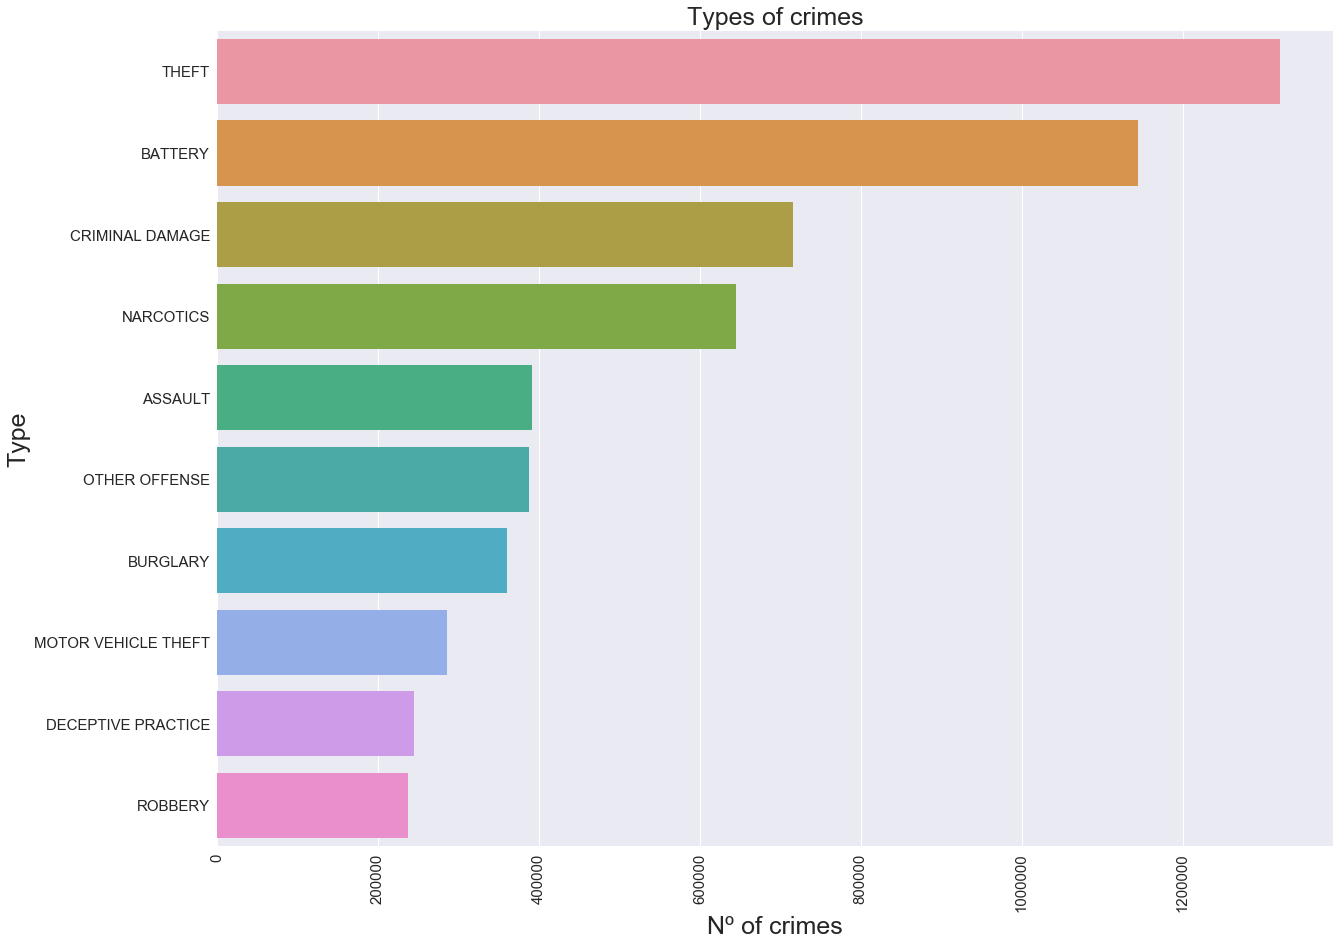

In [24]:
width=0.6

plt.figure(figsize=(20,15))
sns.countplot(data=dataset,y="Primary Type", order=dataset['Primary Type'].value_counts().iloc[:10].index)
plt.title("Types of crimes", fontsize=25)
plt.xlabel("Nº of crimes", fontsize=25)
plt.ylabel("Type", fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)


In [25]:
#Estas son todos los resultados que tenemos como valores unicos en los distintos tipos de crimenes.
dataset['Primary Type'].value_counts()

THEFT                                1321165
BATTERY                              1144756
CRIMINAL DAMAGE                       715245
NARCOTICS                             644940
ASSAULT                               391916
OTHER OFFENSE                         388135
BURGLARY                              360567
MOTOR VEHICLE THEFT                   285123
DECEPTIVE PRACTICE                    245009
ROBBERY                               236745
CRIMINAL TRESPASS                     179862
WEAPONS VIOLATION                      69535
PROSTITUTION                           60262
PUBLIC PEACE VIOLATION                 45259
OFFENSE INVOLVING CHILDREN             42193
CRIM SEXUAL ASSAULT                    24849
SEX OFFENSE                            22259
INTERFERENCE WITH PUBLIC OFFICER       15747
GAMBLING                               13291
LIQUOR LAW VIOLATION                   12095
ARSON                                  10031
HOMICIDE                                9452
KIDNAPPING

A continuación lo que hemos hecho ha sido agrupar los crímenes en función del tipo.Con esto buscamos no tener tantos valores unicos y así lograr menos grupos con el fin de visualizar todos y tener una idéa clara.

In [26]:
dataset["Primary Type"] = dataset["Primary Type"].replace({
     "THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
     "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
     "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
     "OTHER OFFENSES", "DECEPTIVE PRACTICE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "GAMBLING":
     "OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
     "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
     "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
     "NON-CRIMINAL": "OTHER OFFENSES", "PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
     "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
     "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES",
     "HOMICIDE": "ASSAULT" })


In [27]:
#Aquí vemos como la agrupación llevada a cabo ha sido correcta y tenemos solo nuestras 6 categorías.
dataset['Primary Type'].value_counts()

THEFT & ROBBERY    2203600
ASSAULT            1570973
CRIMINAL DAMAGE     905138
OTHER OFFENSES      845195
NARCOTICS           645058
SEX CRIMES           82521
Name: Primary Type, dtype: int64

A continuación visualizamos nuestras nuevas categorías por porcentaje en tipo de crimen. Usamos un grafico de tarta para tener una idéa de cuales son los mayoritarios.

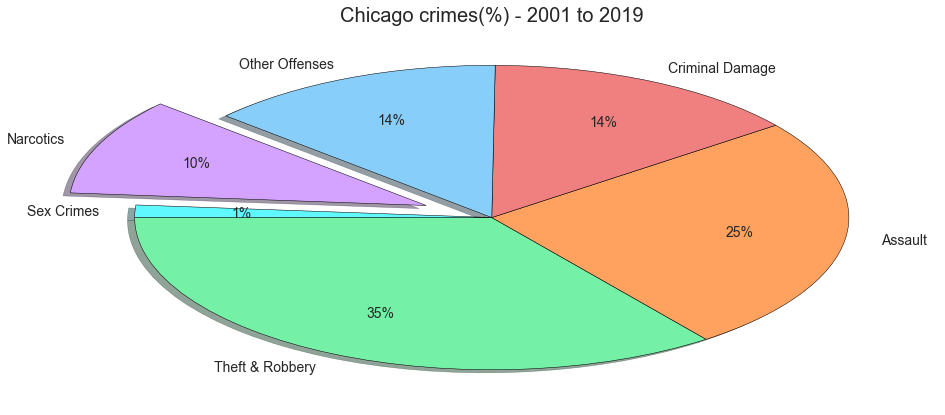

In [28]:
# Etiquetas por grupos:
labels = ['Theft & Robbery','Assault','Criminal Damage','Other Offenses','Narcotics',"Sex Crimes"]

# Colores por grupos:
colors = ["#74F1A7", "#FFA15F", "lightcoral", "lightskyblue", "#D4A3FF", "#5FF8FF"]

# Le explicamos a python que separe la variable de "Narcotics" de las otras variables:
explode = (0, 0, 0, 0, 0.2, 0)

# El tamaño del gráfico:
plt.figure(figsize=(16,7))

# Creamos el gráfico en función de las variables que hemos explicado previamente:
plt.pie(dataset['Primary Type'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle= 180,pctdistance=0.7,wedgeprops={'linewidth': 0.5,"edgecolor":"0", 'linestyle':'solid'},
        textprops={'fontsize':14})

plt.title("Chicago crimes(%) - 2001 to 2019",fontsize=20)


plt.axis='equal'

plt.show()

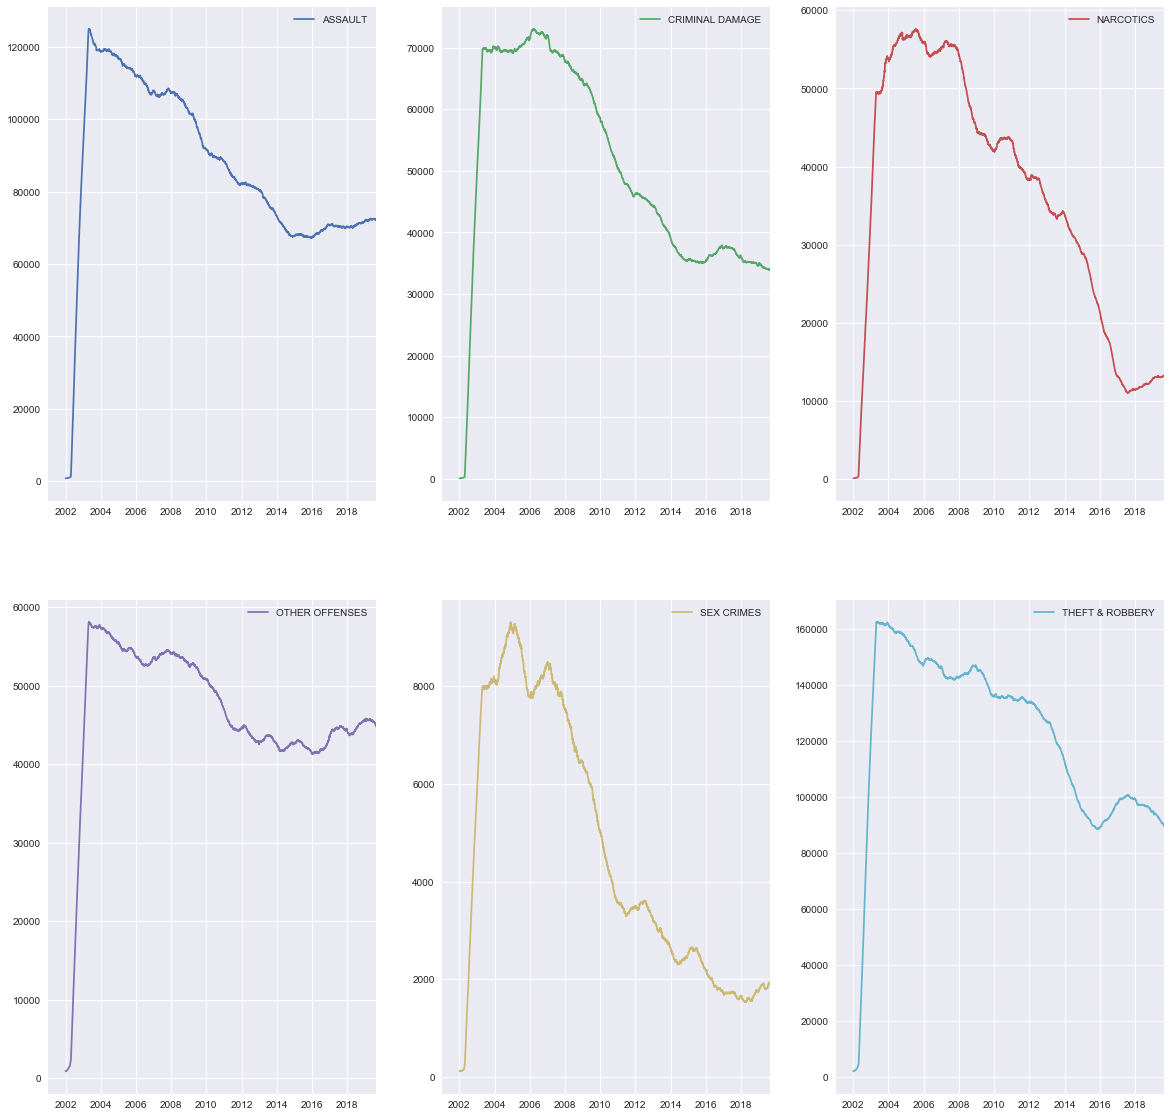

In [29]:
#En esta celda lo que haremos será analizar como es la tendencia de cada uno de los crimenes a lo largo del tiempo.

crimes_count_date = dataset.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=dataset.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 20), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [30]:
# Creamos un dataframe para todos los crímenes y así tener un conteo general:

# Filtramos la informacion de forma en la que solo la categoría 'Theft & Robbery' estan en el dataframe
theft_crimes_df = dataset.loc[dataset["Primary Type"] == "THEFT & ROBBERY", :]
theft_crimes_year = pd.DataFrame({"No. of Theft Crimes":theft_crimes_df.groupby(['Year'])['Primary Type'].count()})

# Reiniciamos el indice y ordenamos los valores por año
theft_crimes_year = theft_crimes_year.reset_index()
theft_crimes_year = theft_crimes_year.sort_values('Year', ascending=True)


# Realizamos lo mismo para las variables 'Assault', 'Criminal Damage', 'Other Offenses' y 'Sex Crimes'
assault_crimes_df = dataset.loc[dataset["Primary Type"] == "ASSAULT", :]
assault_crimes_year = pd.DataFrame({"No. of Assault Crimes":assault_crimes_df.groupby(['Year'])['Primary Type'].count()})

assault_crimes_year = assault_crimes_year.reset_index()
assault_crimes_year = assault_crimes_year.sort_values('Year', ascending=True)


damage_crimes_df = dataset.loc[dataset["Primary Type"] == "CRIMINAL DAMAGE", :]
damage_crimes_year = pd.DataFrame({"No. of Damage Crimes":damage_crimes_df.groupby(['Year'])['Primary Type'].count()})

damage_crimes_year = damage_crimes_year.reset_index()
damage_crimes_year = damage_crimes_year.sort_values('Year', ascending=True)



other_crimes_df = dataset.loc[dataset["Primary Type"] == "OTHER OFFENSES", :]
other_crimes_year = pd.DataFrame({"No. of Other Offense Crimes":other_crimes_df.groupby(['Year'])['Primary Type'].count()})

other_crimes_year = other_crimes_year.reset_index()
other_crimes_year = other_crimes_year.sort_values('Year', ascending=True)


sex_crimes_df = dataset.loc[dataset["Primary Type"] == "SEX CRIMES", :]
sex_crimes_year = pd.DataFrame({"No. of Sex Crimes":sex_crimes_df.groupby(['Year'])['Primary Type'].count()})

sex_crimes_year = sex_crimes_year.reset_index()
sex_crimes_year = sex_crimes_year.sort_values('Year', ascending=True)


# Creamos un dataframe con la información anteriormente recopilada
drugs_crimes_df = dataset.loc[dataset["Primary Type"] == "NARCOTICS", :]
drugs_crimes_year = pd.DataFrame({"No. of Drug Crimes":drugs_crimes_df.groupby(['Year'])['Primary Type'].count()})


drugs_crimes_year = drugs_crimes_year.reset_index()
drugs_crimes_year = drugs_crimes_year.sort_values('Year', ascending=True)

#Mostramos los datos del conteo de crimenes por asalto a lo largo de nuestra serie temporal.
assault_crimes_year.head(19)

,Year,No. of Assault Crimes
0,2001,785
1,2002,92161
2,2003,118801
3,2004,117190
4,2005,112042
5,2006,107888
6,2007,107334
7,2008,102256
8,2009,91730
9,2010,88338


A continuación hemos querido mostrar en un solo gráfico los 6 generados anteriormente. Esto nos va a ayudar para poder ver las tendencias de cada uno comparandolos a su vez con el resto y consideramos que aporta mucha información.

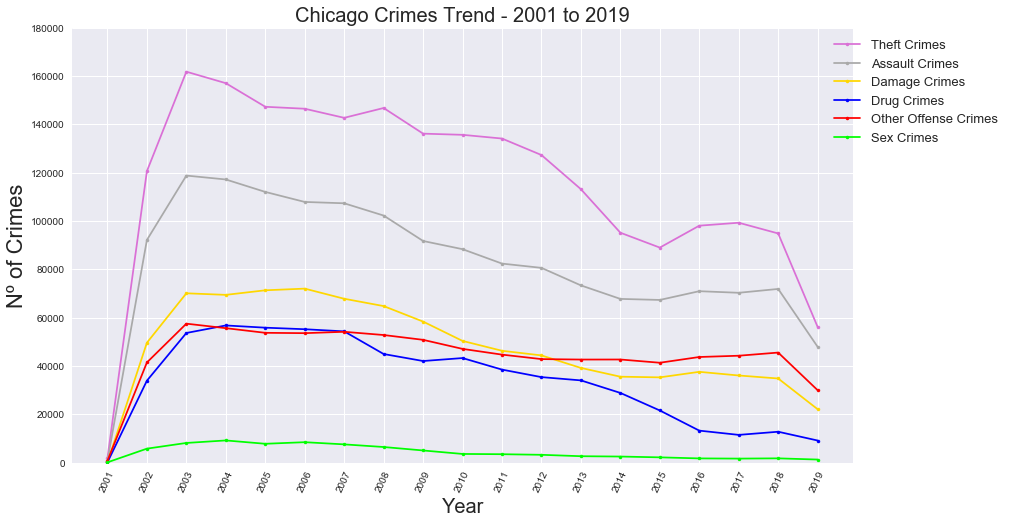

In [31]:
plt.figure(figsize=(14,8))


plt.plot(theft_crimes_year['Year'], theft_crimes_year['No. of Theft Crimes'], marker ='.', 
         color='orchid', label="Theft Crimes")

plt.plot(assault_crimes_year['Year'], assault_crimes_year['No. of Assault Crimes'], marker ='.',
         color='darkgrey', label="Assault Crimes")

plt.plot(damage_crimes_year['Year'], damage_crimes_year['No. of Damage Crimes'], marker ='.',
         color='gold', label="Damage Crimes")

plt.plot(drugs_crimes_year['Year'], drugs_crimes_year['No. of Drug Crimes'], marker ='.', 
         color='blue', label="Drug Crimes")

plt.plot(other_crimes_year['Year'], other_crimes_year['No. of Other Offense Crimes'], marker ='.',
         color='red', label="Other Offense Crimes")

plt.plot(sex_crimes_year['Year'], sex_crimes_year['No. of Sex Crimes'], marker ='.', 
         color='lime', label="Sex Crimes")


plt.title('Chicago Crimes Trend - 2001 to 2019',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylim(0,180000)
plt.ylabel("Nº of Crimes",fontsize=22)
plt.legend(bbox_to_anchor =[1.20,1],fontsize=13)
plt.xticks(np.arange(2001,2020,1), rotation = 65)
plt.grid(True)


plt.show()

### Primary Type | NARCOTICS

A continuación realizaremos un analisis un poco mas exhaustivo en lo que se refiere a crimenes por drogras.

In [32]:
drugs_crimes_df = dataset.loc[dataset["Primary Type"] == "NARCOTICS", :]

In [33]:
drugs_crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-26 23:45:00,11807745,JC408749,2019-08-26 23:45:00,079XX S UNION AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VACANT LOT/LAND,True,False,...,-87.64,"(41.750074658, -87.641583132)",17.0,21554.0,70.0,529.0,31.0,59.0,20.0,229.0
2019-08-26 22:55:00,11807700,JC408691,2019-08-26 22:55:00,014XX N KEYSTONE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,-87.73,"(41.90704733, -87.72765795)",27.0,4299.0,24.0,286.0,49.0,5.0,6.0,194.0
2019-08-26 22:55:00,11807698,JC408685,2019-08-26 22:55:00,049XX W DEMING PL,2022,NARCOTICS,POSS: COCAINE,STREET,True,False,...,-87.75,"(41.926955506, -87.750216579)",7.0,22615.0,19.0,304.0,17.0,2.0,6.0,176.0
2019-08-26 21:48:00,11807645,JC408643,2019-08-26 21:48:00,061XX S DR MARTIN LUTHER KING JR DR,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),STREET,True,False,...,-87.62,"(41.783209684, -87.615696882)",53.0,22260.0,9.0,331.0,4.0,60.0,18.0,275.0
2019-08-26 21:40:00,11807708,JC408686,2019-08-26 21:40:00,040XX W VAN BUREN ST,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),SIDEWALK,True,False,...,-87.73,"(41.875258543, -87.726199383)",36.0,21572.0,27.0,675.0,23.0,30.0,16.0,142.0


In [34]:
# Agrupamos actos delictivos con significados similares y conseguir así menos categorías
# Este paso es similiar al realizado anteriormente. Clarifica todo y ayuda en su análisis.

drugs_crimes_df['Description'] = drugs_crimes_df["Description"].replace({"POSS: CANNABIS 30GMS OR LESS":"CANNABIS",
                                "POSS CRACK":'COCAINE',"POSS: HEROIN(WHITE)":"HEROIN","POSS: COCAINE":"COCAINE",
                               "MANU/DELIVER: HEROIN (WHITE)":"HEROIN","POSS: CANNABIS MORE THAN 30GMS":"CANNABIS",
                                "MANU/DEL:CANNABIS OVER 10 GMS":"CANNABIS","ATTEMPT POSSESSION CANNABIS":"CANNABIS",
                                "CANNABIS PLANT":"CANNABIS","POSSESSION: SYNTHETIC MARIJUANA":"CANNABIS",
                                "DELIVER CANNABIS TO PERSON <18":"CANNABIS","MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA":
                                "CANNABIS","MANU/DEL:CANNABIS 10GM OR LESS":"CANNABIS","POSS: CRACK":"COCAINE","POSS: PCP":"OTHERS",
                                "POSS: SYNTHETIC DRUGS":"OTHERS","POSS: HEROIN(BRN/TAN)":"OTHERS","MANU/DELIVER:CRACK":"COCAINE",
                                "POSS: HALLUCINOGENS":"OTHERS","MANU/DELIVER:COCAINE":"COCAINE","CALCULATED CANNABIS CONSPIRACY":
                                "CANNABIS","ALTER/FORGE PRESCRIPTION":"OTHERS","POSS: BARBITUATES":"OTHERS","POS: HYPODERMIC NEEDLE":
                                "HEROIN","POSS: AMPHETAMINES": "OTHERS","SALE/DEL HYPODERMIC NEEDLE": "HEROIN","SOLICIT NARCOTICS ON PUBLICWAY":
                                "CANNABIS","ATTEMPT POSSESSION NARCOTICS": "CANNABIS", "ATTEMPT POSSESSION NARCOTICS": "CANNABIS",
                                "INTOXICATING COMPOUNDS":"OTHERS", "CRIMINAL DRUG CONSPIRACY": "OTHERS", "FOUND SUSPECT NARCOTICS": "CANNABIS",
                                "POSSESSION OF DRUG EQUIPMENT": "OTHERS","FORFEIT PROPERTY": "OTHERS", "POSSESSION OF DRUG EQUIPMENT": "OTHERS",
                                "MANU/DELIVER: HEROIN(BRN/TAN)": "HEROIN", "MANU/DELIVER: HALLUCINOGEN": "OTHERS", "POSS: METHAMPHETAMINES": "OTHERS",
                                "MANU/DELIVER:PCP": "OTHERS", "POSS: HEROIN(BLACK TAR": "HEROIN", "MANU/DELIVER:BARBITUATES": "OTHERS",
                                "MANU/DELIVER:SYNTHETIC DRUGS": "OTHERS","SALE/DEL DRUG PARAPHERNALIA":"OTHERS","CONT SUBS:FAIL TO MAINT RECORD":
                                "OTHERS","FAIL REGISTER LIC:CONT SUBS":"OTHERS","FAILURE TO KEEP HYPO RECORDS":"OTHERS","POSS: HEROIN(BLACK TAR)": 
                                "HEROIN", "POSS: LOOK-ALIKE DRUGS":"OTHERS","MANU/DELIVER:AMPHETAMINES": "OTHERS","MANU/DELIVER: METHAMPHETAMINES":
                                "OTHERS", "DEL CONT SUBS TO PERSON <18":"OTHERS", "MANU/DELIVER:HEROIN(BLACK TAR)":"HEROIN",
                                "MANU/DELIVER:LOOK-ALIKE DRUG":"OTHERS"
                                 })

In [35]:
# Aquí observamos como los cambios han surgido efecto de forma correcta.

drugs_crimes_df['Description'].value_counts()

CANNABIS    358482
COCAINE     146162
HEROIN      107828
OTHERS       32586
Name: Description, dtype: int64

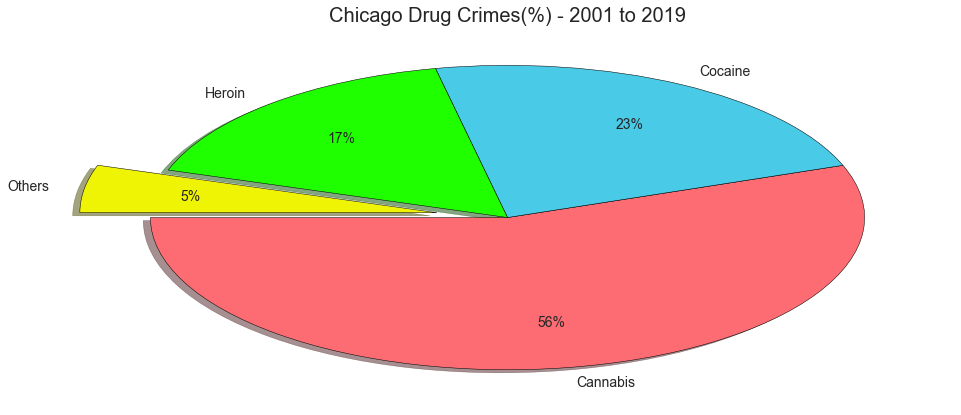

In [36]:
labels = ['Cannabis','Cocaine','Heroin','Others']

colors = ["#FD6C72", "#49CAE7", "#1FFF00", "#EFF304"]

explode = (0, 0, 0, 0.2,)

plt.figure(figsize=(16,7))

plt.pie(drugs_crimes_df['Description'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle= 180,pctdistance=0.7,wedgeprops={'linewidth': 0.5,"edgecolor":"0", 'linestyle':'solid'},
        textprops={'fontsize':14})

plt.axis='equal'
plt.title("Chicago Drug Crimes(%) - 2001 to 2019",fontsize=20)


plt.show()

Una vez visualizado nuestro gráfico de tarta, visualizaremos la linea de tendencia a lo largo de la serie temporal en lo que respecta a los crimenes por drogas. Podemos ver que en los últimos años la tendencia esta en descenso lo que supone una fantástica noticia.

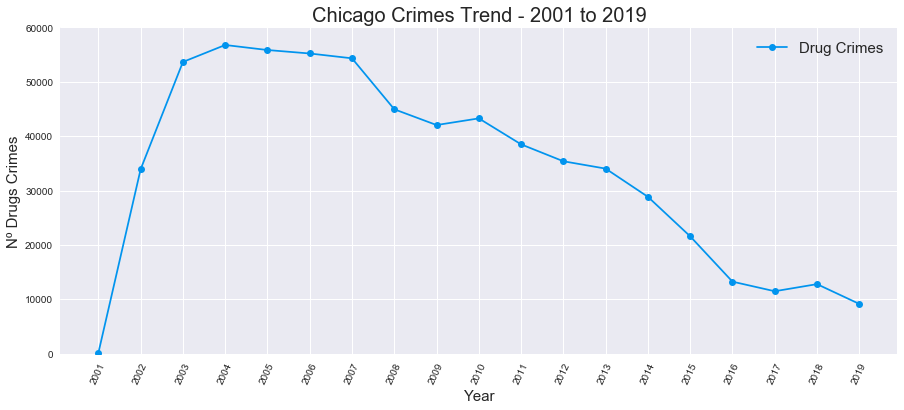

In [37]:
plt.figure(figsize=(15,6))

plt.plot(drugs_crimes_year['Year'], drugs_crimes_year['No. of Drug Crimes'], marker ='o',
         color='#0194EE', label="Drug Crimes")

plt.title('Chicago Crimes Trend - 2001 to 2019',fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylim(0,60000)
plt.ylabel("Nº Drugs Crimes",fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xticks(np.arange(2001,2020,1), rotation = 65)
plt.grid(True)



plt.show()

Una vez vista esta tendencia, vamos a graficar la relación que tiene cada uno de los barrios de la ciudad con los diferentes crimenes de drogas acontecidos en sus calles.

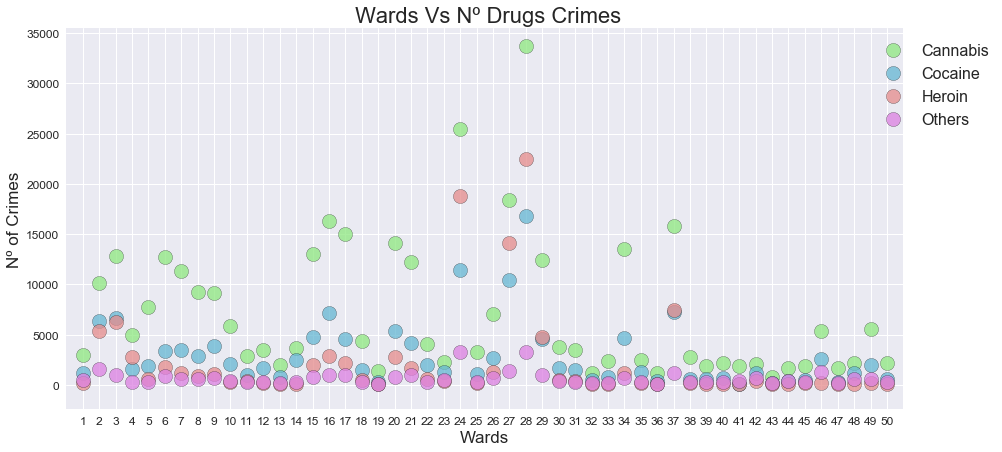

In [38]:
# Filtramos la informacion con aquellas variables que queremos en nuestro nuevo dataframe
drug_cann_wards = drugs_crimes_df.loc[drugs_crimes_df['Description'] == "CANNABIS", :]
drug_coca_wards = drugs_crimes_df.loc[drugs_crimes_df['Description'] == "COCAINE", :]
drug_hero_wards = drugs_crimes_df.loc[drugs_crimes_df['Description'] == "HEROIN", :]
drug_other_wards = drugs_crimes_df.loc[drugs_crimes_df['Description'] == "OTHERS", :]

# Agrupamos por barrios
x_cann_axis = drug_cann_wards.groupby('Ward')['Description'].count()
x_coca_axis = drug_coca_wards.groupby('Ward')['Description'].count()
x_hero_axis = drug_hero_wards.groupby('Ward')['Description'].count()
x_others_axis = drug_other_wards.groupby('Ward')['Description'].count()



drug_crimes_wards = pd.DataFrame({'X-axis':x_cann_axis.index , "Cannabis":x_cann_axis,'X1-axis':x_coca_axis.index,
                                  "Cocaine":x_coca_axis, "X2-axis": x_hero_axis.index,"Heroin": x_hero_axis, 
                                  'X3-axis': x_others_axis.index, "Others": x_others_axis})



plt.figure(figsize=(15,7))

plt.grid(True)

# Creamos un gráfico de puntos con las diferentes drogas
can = plt.scatter(drug_crimes_wards['X-axis'] , drug_crimes_wards['Cannabis'], marker="o", facecolors="#8EE880",
                  s= 200, edgecolors="black",alpha=0.75)

coc = plt.scatter(drug_crimes_wards['X1-axis'] , drug_crimes_wards['Cocaine'], marker="o", facecolors="#65B7D2", 
                  s= 200, edgecolors="black", alpha=0.75)

her =plt.scatter(drug_crimes_wards['X2-axis'] , drug_crimes_wards['Heroin'], marker="o", facecolors="#E58B8B",
                 s= 200, edgecolors="black",alpha=0.75)

oth = plt.scatter(drug_crimes_wards['X3-axis'] , drug_crimes_wards['Others'], marker="o", facecolors="#DC80E1",
                  s= 200, edgecolors="black",alpha=0.75)


plt.xticks(np.arange(1,51,1), rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,51)
plt.title(" Wards Vs Nº Drugs Crimes",fontsize=22)
plt.xlabel("Wards",fontsize=17)
plt.ylabel("Nº of Crimes",fontsize=17)
plt.legend((can,coc,her,oth),('Cannabis', 'Cocaine','Heroin', 'Others'), scatterpoints=1, 
           bbox_to_anchor = [1.12,1], ncol=1, fontsize=16)



plt.show()

### Location Description

A continuación analizaremos los crimenes en función del lugar donde han ocurrido. Y como podemos observar la mayoría de estos tienen lugar en plena calle o por el contrario en residencias privadas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

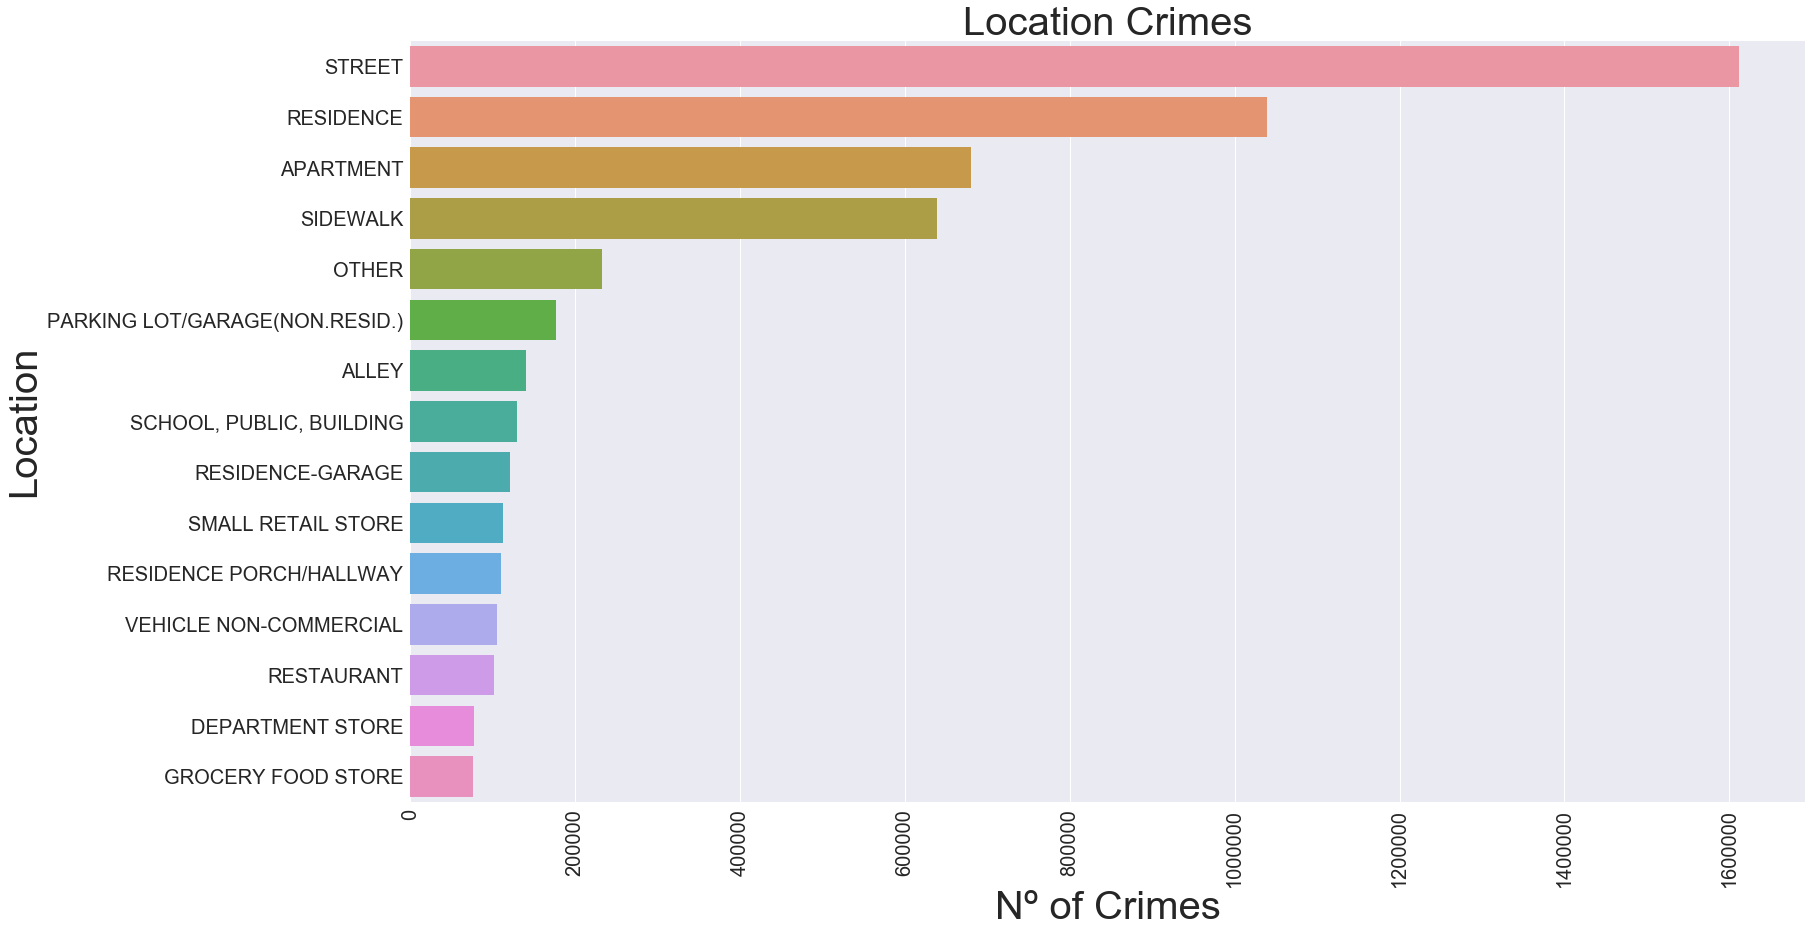

In [39]:
plt.figure(figsize=(25,14))
sns.countplot(y='Location Description', data=dataset, order=dataset['Location Description'].value_counts().iloc[:15].index)
plt.title("Location Crimes", fontsize=40)
plt.xlabel("Nº of Crimes", fontsize=40)
plt.ylabel("Location", fontsize=40)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

In [40]:
# Aquí obtenemos el numero total de delitos en función de su localización.

dataset["Location Description"].value_counts()

STREET                   1611534
RESIDENCE                1039117
APARTMENT                 679996
SIDEWALK                  638461
OTHER                     232847
                          ...   
POOLROOM                       1
EXPRESSWAY EMBANKMENT          1
LAGOON                         1
LIVERY AUTO                    1
FUNERAL PARLOR                 1
Name: Location Description, Length: 179, dtype: int64

Y al igual que en otras variables distintas, lo que hacemos como siempre es agruparlas para un análisis mas claro y visual. En este caso mediante la clasificación de las localizaciones.

In [41]:
dataset["Location Description"] = dataset['Location Description'].replace({"SIDEWALK":"STREET", "ALLEY":"STREET",
            "APARTMENT":"RESIDENCE","RESIDENCE-GARAGE":"RESIDENCE","RESIDENCE PORCH/HALLWAY": 
            "RESIDENCE", "RESIDENTIAL YARD (FRONT/BACK)":"RESIDENCE","CHA APARTMENT": "RESIDENCE",
            "CHA HALLWAY/STAIRWELL/ELEVATOR": "RESIDENCE","SMALL RETAIL STORE":"RETAIL OUTLET","DRUG STORE":
            "RETAIL OUTLET","GAS STATION":"RETAIL OUTLET","DEPARTMENT STORE":"RETAIL OUTLET","RETAIL STORES":
            "RETAIL OUTLET","RESTAURANT":"BUSINESS","BAR OR TAVERN":"BUSINESS","RESTAURANT":"BUSINESS","BANK":
            "BUSINESS","HOTEL/MOTEL":"BUSINESS","VEHICLE NON-COMMERCIAL":"VEHICLE","PARKING LOT":"PUBLIC BUILDING/GROUNDS",
            "SCHOOL, PUBLIC, BUILDING":"SCHOOL","PARK PROPERTY":"PUBLIC BUILDING/GROUNDS","CTA PLATFORM":
            "PUBLIC BUILDING/GROUNDS","CHA PARKING LOT/GROUNDS":"PUBLIC BUILDING/GROUNDS","SCHOOL, PUBLIC, GROUNDS":
            "SCHOOL", "CTA TRAIN":"PUBLIC BUILDING/GROUNDS","VACANT LOT/LAND":"PUBLIC BUILDING/GROUNDS",
            "GROCERY FOOD STORE":"RETAIL OUTLET","PUBLIC HIGH SCHOOL":"SCHOOL",'CTA "L" TRAIN':
            "PUBLIC BUILDING/GROUNDS","PARKING LOT/GARAGE(NON.RESID.)":"PUBLIC BUILDING/GROUNDS","CTA BUS":"VEHICLE",
            "TAVERN/LIQUOR STORE":"RETAIL OUTLET","HOSPITAL BUILDING/GROUNDS":"HOSPITAL",
            "POLICE FACILITY/VEH PARKING LOT":"POLICE BUILDING","CONVENIENCE STORE":
            "RETAIL OUTLET","CHURCH/SYNAGOGUE/PLACE OF WORSHIP":"CHURCH","GOVERNMENT BUILDING/PROPERTY":
            "FEDERAL BUILDING","SCHOOL, PRIVATE, BUILDING":"SCHOOL","GOVERNMENT BUILDING":
            "FEDERAL BUILDING","CONSTRUCTION SITE":"BUSINESS","WAREHOUSE":"BUSINESS","AIRCRAFT":"AIRPORT",
            "ABANDONED BUILDING":"OTHER","CTA GARAGE / OTHER PROPERTY":"PUBLIC BUILDING/GROUNDS","TAXICAB":"VEHICLE",
            "CTA BUS STOP":"PUBLIC BUILDING/GROUNDS","BARBERSHOP":"BUSINESS","CURRENCY EXCHANGE":"BUSINESS","LIBRARY":
            "PUBLIC BUILDING/GROUNDS","ATHLETIC CLUB":"PUBLIC BUILDING/GROUNDS","MEDICAL/DENTAL OFFICE":"BUSINESS",
            "FACTORY/MANUFACTURING BUILDING":"BUSINESS","COMMERCIAL / BUSINESS OFFICE":"BUSINESS","SCHOOL, PRIVATE, GROUNDS":
            "SCHOOL","CLEANING STORE":"RETAIL OUTLET","VEHICLE-COMMERCIAL":"VEHICLE","COLLEGE/UNIVERSITY GROUNDS":"SCHOOL",
            "DRIVEWAY - RESIDENTIAL":"RESIDENCE","SPORTS ARENA/STADIUM":"PUBLIC BUILDING/GROUNDS","CTA STATION":
            "PUBLIC BUILDING/GROUNDS","ATM (AUTOMATIC TELLER MACHINE)":"BUSINESS","DAY CARE CENTER":"SCHOOL","BUSINESS":
            "BUSINESS","CAR WASH":"BUSINESS","AUTO":"VEHICLE","COLLEGE/UNIVERSITY RESIDENCE HALL":"SCHOOL","MOVIE HOUSE/THEATER":
            "RETAIL OUTLET", "APPLIANCE STORE":"RETAIL OUTLET","HIGHWAY/EXPRESSWAY":"STREET","LAKEFRONT/WATERFRONT/RIVERBANK":
            "OTHER","AIRPORT TERMINAL UPPER LEVEL - SECURE AREA":"AIRPORT","AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA":
            "AIRPORT","AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA":"AIRPORT","AIRPORT VENDING ESTABLISHMENT":"AIRPORT",
            "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA":"AIRPORT","AIRPORT BUILDING NON-TERMINAL - SECURE AREA":"AIRPORT",
            "DELIVERY TRUCK":"VEHICLE","ANIMAL HOSPITAL":"HOSPITAL","AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA":"AIRPORT",
            "AIRPORT PARKING LOT":"AIRPORT","OTHER COMMERCIAL TRANSPORTATION":"VEHICLE","VEHICLE - OTHER RIDE SERVICE":"VEHICLE",
            "CREDIT UNION":"BUSINESS","AIRPORT EXTERIOR - NON-SECURE AREA":"AIRPORT","HOUSE":"RESIDENCE","AIRPORT EXTERIOR - SECURE AREA":
            "AIRPORT", "POOL ROOM":"OTHER","COIN OPERATED MACHINE":"OTHER","PAWN SHOP":"OTHER","YARD":"OTHER","BOWLING ALLEY":"OTHER",
            "BOAT/WATERCRAFT":"OTHER","BRIDGE":"STREET","CEMETERY":"PUBLIC BUILDING/GROUNDS","FOREST PRESERVE":
            "OTHER","SAVINGS AND LOAN":"BUSINESS","VACANT LOT":"OTHER","GANGWAY":"AIRPORT","PUBLIC BUILDING/GROUND":"PUBLIC BUILDING/GROUNDS",
            "VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)":"VEHICLE","PORCH":"RESIDENCE","NEWSSTAND":"STREET","RETAIL STORE":"RETAIL OUTLET",
            "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA":"AIRPORT","AIRPORT TRANSPORTATION SYSTEM (ATS)":"AIRPORT","HALLWAY":"OTHER",
            "VEHICLE - DELIVERY TRUCK":"VEHICLE","AUTO / BOAT / RV DEALERSHIP":"BUSINESS","CEMETARY":"PUBLIC BUILDING/GROUNDS","GARAGE":"OTHER",
            "CTA TRACKS - RIGHT OF WAY":"OTHER","CHA PARKING LOT":"PUBLIC BUILDING/GROUNDS","GAS STATION DRIVE/PROP.":"RETAIL OUTLET",
            "CHA GROUNDS":"PUBLIC BUILDING/GROUNDS","TAVERN":"BUSINESS","BASEMENT":"RESIDENCE","CHA HALLWAY":"RESIDENCE","OFFICE":"BUSINESS",
            "DRIVEWAY":"RESIDENCE","VESTIBULE":"OTHER","STAIRWELL":"OTHER","HOTEL":"BUSINESS","CLUB":"BUSINESS","OFFICE":"BUSINESS","BARBER SHOP/BEAUTY SALON":
            "BUSINESS","SCHOOL YARD":"SCHOOL","RAILROAD PROPERTY":"PUBLIC BUILDING/GROUNDS","PUBLIC GRAMMAR SCHOOL":"SCHOOL","TRUCK":"VEHICLE","TAXI CAB":
            "VEHICLE","DUMPSTER":"VEHICLE","MOTEL":"BUSINESS","CHA LOBBY":"PUBLIC BUILDING/GROUNDS","CHA STAIRWELL":"PUBLIC BUILDING/GROUNDS",
            "GARAGE/AUTO REPAIR":"BUSINESS","LIQUOR STORE":"RETAIL OUTLET","NURSING HOME":"HOSPITAL","CTA PROPERTY":"PUBLIC BUILDING/GROUNDS","TRAILER":"OTHER",
            "YMCA":"OTHER","LAKE":"OTHER","VEHICLE-COMMERCIAL - TROLLEY BUS":"VEHICLE","VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS":"VEHICLE","RIVER":"OTHER",
            "KENNEL":"OTHER","FUNERAL PARLOR":"BUSINESS","BANQUET HALL":"OTHER","ROOMING HOUSE":"OTHER","LIVERY STAND OFFICE":"BUSINESS",
            "LAUNDRY ROOM":"OTHER","PRAIRIE":"OTHER","RIVER BANK":"OTHER","COACH HOUSE":"OTHER","SEWER":"OTHER","LAGOON":"OTHER","CLEANERS/LAUNDROMAT":"BUSINESS",
            "HORSE STABLE":"OTHER","FACTORY":"BUSINESS","CHA BREEZEWAY":"OTHER","CHA ELEVATOR":"PUBLIC BUILDING/GROUNDS","FARM":"OTHER","ELEVATOR":"OTHER",
            "POOLROOM":"OTHER","WOODED AREA":"OTHER","LOADING DOCK":"OTHER","TRUCKING TERMINAL":"OTHER","LIVERY AUTO":"BUSINESS","CHURCH PROPERTY":"CHURCH",
            "EXPRESSWAY EMBANKMENT":"STREET","CHA PLAY LOT":"PUBLIC BUILDING/GROUNDS",'CTA "L" PLATFORM':"PUBLIC BUILDING/GROUNDS","JUNK YARD/GARBAGE DUMP":
            "OTHER","COUNTY JAIL":"POLICE/FIRE STATION","JAIL / LOCK-UP FACILITY":"POLICE/FIRE STATION","POLICE BUILDING":"POLICE/FIRE STATION",
            "NURSING HOME/RETIREMENT HOME":"HOSPITAL", "FIRE STATION":"POLICE/FIRE STATION","OTHER RAILROAD PROP / TRAIN DEPOT":"PUBLIC BUILDING/GROUNDS","AIPORT/AIRCRAFT":
            "AIRPORT/AIRCRAFT","AIRPORT": "AIRPORT/AIRCRAFT","HOSPITAL":"PUBLIC BUILDING/GROUNDS","CHURCH":"OTHER","FEDERAL BUILDING":"PUBLIC BUILDING/GROUNDS",
            "POLICE/FIRE STATION":"PUBLIC BUILDING/GROUNDS","AIRPORT/AIRCRAFT":"PUBLIC BUILDING/GROUNDS","PUBLIC BUILDING/GROUNDS":"PUBLIC BLDG"                                        
            })

In [42]:
# Comprobamos que se ha realizado correctamente.

dataset["Location Description"].value_counts()

STREET                     2391741
RESIDENCE                  2090360
PUBLIC BUILDING/GROUNDS     408717
RETAIL OUTLET               407859
BUSINESS                    290704
OTHER                       249178
SCHOOL                      181988
VEHICLE                     142755
HOSPITAL                     32395
POLICE BUILDING              16378
CHURCH                       13910
FEDERAL BUILDING             12691
AIRPORT                      11815
POLICE/FIRE STATION           1994
Name: Location Description, dtype: int64

In [43]:
#Aquí podemos ver en que lugares ocurren los crimenes de drogas.

all_crime_locations = pd.DataFrame({"No. of Drug Crimes":dataset['Location Description'].value_counts()})

all_crime_locations.head()

,No. of Drug Crimes
STREET,2391741
RESIDENCE,2090360
PUBLIC BUILDING/GROUNDS,408717
RETAIL OUTLET,407859
BUSINESS,290704


Y la siguiente celda es similar a la anterior solo que contamos el total de crimenes cometidos, no solo los relacionados con drogas. Además sacamos el porcentaje de cada localización para tener una idea más clara.

In [44]:
drugs_crimes_locations = pd.DataFrame({"Crime_count": drugs_crimes_df.groupby(['Location Description'])['Primary Type'].count(),
                                     "Percentage(%)":(drugs_crimes_df.groupby(['Location Description'])['Primary Type'].count() /
                                     drugs_crimes_df['Primary Type'].count()) * 100 })

drugs_crimes_locations = drugs_crimes_locations.reset_index()
drugs_crimes_locations = drugs_crimes_locations.sort_values('Crime_count', ascending=False)

drugs_crimes_locations.head(9)

,Location Description,Crime_count,Percentage(%)
93,STREET,222839,34.55
90,SIDEWALK,210227,32.59
15,ALLEY,41759,6.47
80,RESIDENCE,24112,3.74
99,VEHICLE NON-COMMERCIAL,18952,2.94
32,CHA PARKING LOT/GROUNDS,15523,2.41
76,PARKING LOT/GARAGE(NON.RESID.),12611,1.96
17,APARTMENT,11886,1.84
72,OTHER,10512,1.63


Queremos tambien mostrar un gráfico de las cinco localizaciones con más crímenes

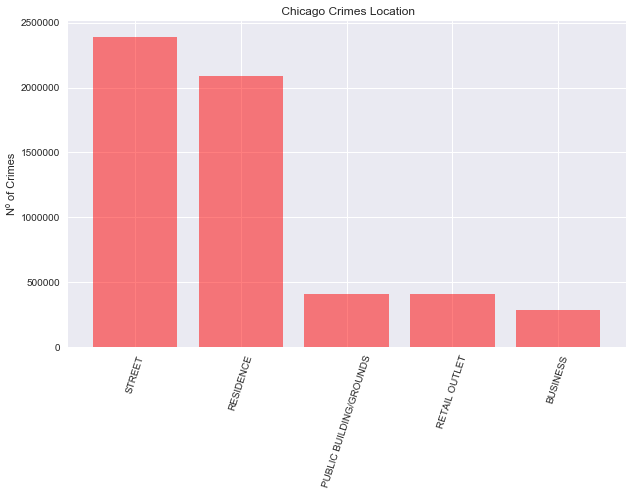

In [48]:
# Asignamos las variables para representarlas  
y_axis = all_crime_locations['No. of Drug Crimes'].head()
x_axis = all_crime_locations.head().index
color = ['blue']

# Damos formato al gráfico
plt.figure(figsize=(10,6))
  
plt.bar(x_axis, y_axis , color="red", alpha=0.5, align="center")

plt.title(" Chicago Crimes Location")
plt.ylabel("Nº of Crimes")
plt.xticks(rotation=72)
plt.grid(True)

#plt.savefig("Chicago_TFM_Imagenes\\Loc_Crimenes_Chicago.png")

plt.show()

### Arrest

A continuación analizamos los crimenes de arresto.

In [44]:
#¿Se han producido arrestos en chicago?,¿Cuántos?

dataset['Arrest'].value_counts()

False    4540639
True     1711846
Name: Arrest, dtype: int64

Parece ser que del total de los crimenes si que hay algunos relacionados con arrestos, veamos entonces mediante un gráfico de tarta que parte del total se corresponde a estos.

In [45]:
#Representacion grafica de arrestos

dataset_arresto = dataset['Arrest'].value_counts()
porcentaje_arresto = (dataset_arresto / dataset['Arrest'].sum()) * 100
porcentaje_arresto.rename("% of Arrests",inplace=True)



## Renombramos los arrestados y no arrestados
porcentaje_arresto.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

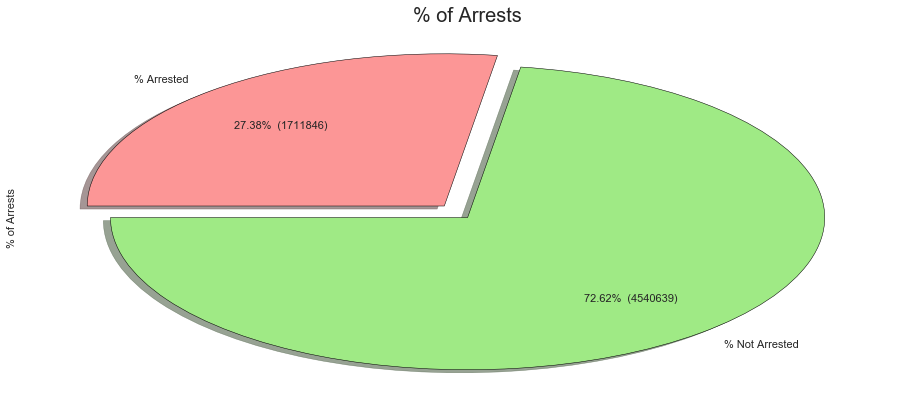

In [46]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Mostramos en un gráfico de tarta nuestros resultados.
colors = ["#9FEA85", "#FC9696"]

explode = (0, 0.1)

porcentaje_arresto.plot.pie(fontsize=11,
                       autopct=make_autopct(dataset['Arrest'].value_counts()),
                       figsize=(16,7),shadow=True, startangle= 180, explode=explode,colors=colors,pctdistance=0.7,
                        wedgeprops={'linewidth': 0.5,"edgecolor":"0", 'linestyle':'solid'},
                        textprops={'fontsize':14})

plt.title("% of Arrests",fontsize=20)
plt.axis=("equal")

In [47]:
#¿Año con mas arrestos?
## Agrupamos el dataset por años y vemos en que porcentaje se dan por año
arrestos_año = dataset.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrestos_año['Percentage'] = (100 * arrestos_año / arrestos_año.groupby(level=0).sum())
arrestos_año.reset_index(level=[1],inplace=True)
arrestos_año

,Arrest,Counts,Percentage
Year,,,
2001,False,3160,81.57
2001,True,714,18.43
2002,False,247788,72.12
2002,True,95788,27.88
2003,False,330073,70.23
2003,True,139902,29.77
2004,False,321498,69.10
2004,True,143755,30.90
2005,False,308241,68.80


Ahora realizaremos un grafico para ver que tendencia ha discurrido a lo largo de los años.

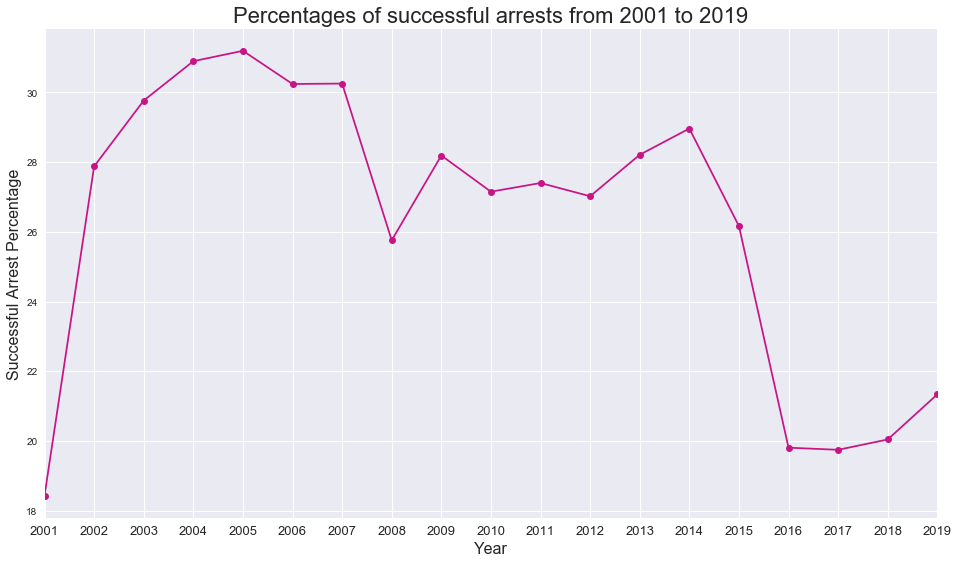

In [48]:
#Representacion de los arrestos por año.
rep_arrestos_año = arrestos_año[arrestos_año['Arrest'] == True]['Percentage']

labels = rep_arrestos_año.index.values
fig=plt.figure(figsize=(16, 9))
plt.title('Percentages of successful arrests from 2001 to 2019',fontsize=22)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Successful Arrest Percentage",fontsize=16)
plt.xticks(rep_arrestos_año.index, rep_arrestos_año.index.values,fontsize=13)

rep_arrestos_año.plot(grid=True, marker='o', color='mediumvioletred')

¿Y si analizasemos los crimenes por mes?¿Se presenta algún tipo de estacionalidad?

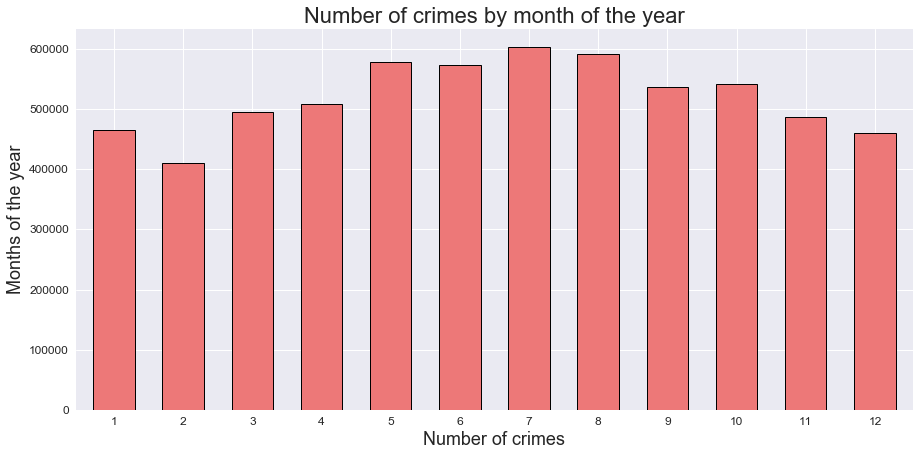

In [49]:
width = 0.6

dataset.groupby([dataset.index.month]).size().plot(kind='bar',figsize=(15,7),
                color='#ED7878',width=width, linewidth=1,edgecolor='0')
plt.ylabel('Months of the year',fontsize=18)
plt.xlabel('Number of crimes',fontsize=18)
plt.title('Number of crimes by month of the year',fontsize=22)
plt.xticks(fontsize=12,rotation=0)
plt.yticks(fontsize=12)

plt.show()



Podemos comprobar que al parecer existe una cierta coorrelación entre los crimenes y la época del año pues según nos muestran los datos en los meses de más calor se producen mas crimenes.

¿Y por días de la semana?¿Se presenta algún tipo de coorrelación?.

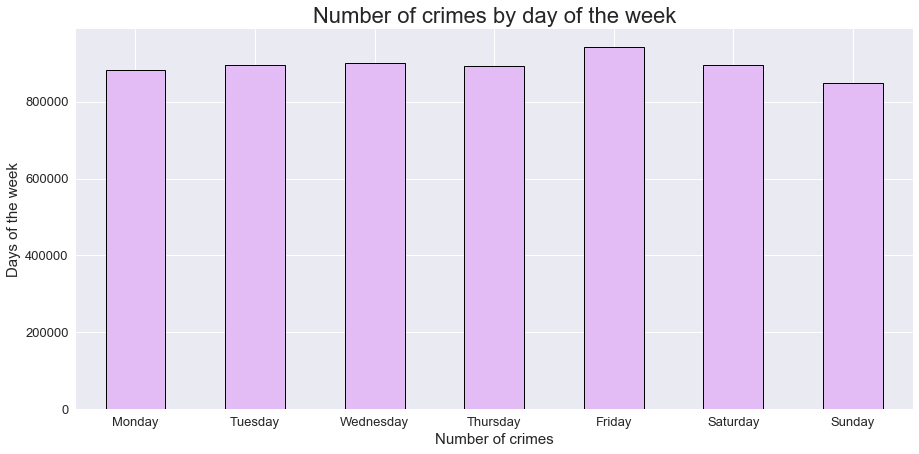

In [50]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
width=0.5

dataset.groupby([dataset.index.dayofweek]).size().plot(kind='bar',figsize=(15,7),
                color='#E3BCF6',width=width, linewidth=1,edgecolor='0')
plt.ylabel('Days of the week',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(np.arange(7), days,rotation=0,fontsize=13)
plt.xlabel('Number of crimes',fontsize=15)
plt.title('Number of crimes by day of the week',fontsize=22)
plt.show()

Parece ser que podriamos concluir que el viernes se aprecia un ligero aumento

Ahora veremos cual es el comportamiento a lo largo de la serie temporal por trimestre.

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]), <a list of 9 Text yticklabel objects>)

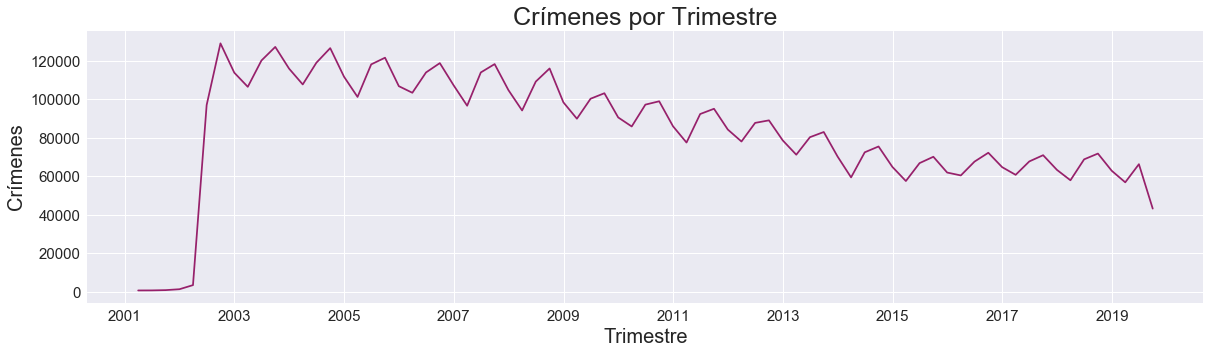

In [51]:
plt.figure(figsize=(20,5))
plt.plot(dataset.resample("Q").size(),color='#97216B')
plt.title("Crímenes por Trimestre", fontsize=25)
plt.xlabel("Trimestre", fontsize=20)
plt.ylabel("Crímenes", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### District

¿Con que frecuencia se cometen crimenes en los distintos distritos de la ciudad?. A continuación se pueden ver los distritos ordenador de mayor a menor en función de sus delitos.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text xticklabel objects>)

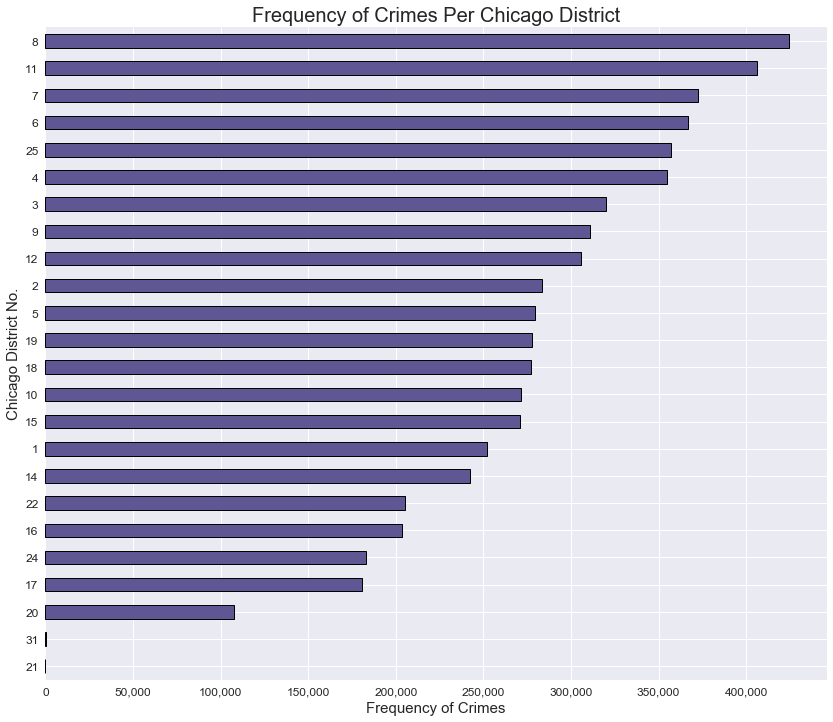

In [57]:
# incidentes por distrito
crimen_distrito = dataset['District'].value_counts(ascending=True)

## Limpieza de datos
crimen_distrito.index = crimen_distrito.index.astype(int)
crimen_distrito.index = crimen_distrito.index.astype(str)

## Visualización
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago District",fontsize=20)
plt.xlabel("Frequency of Crimes",fontsize=15)
plt.ylabel("Chicago District No.",fontsize=15)
ax = crimen_distrito.plot(kind='barh',linewidth=1,edgecolor='0',color='#5E5793')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

Al igual que antes, mediane un grafico de dispersión vamos sacar por pantalla los tipos de delitos que se cometen en cada barrio en función de su naturaleza.

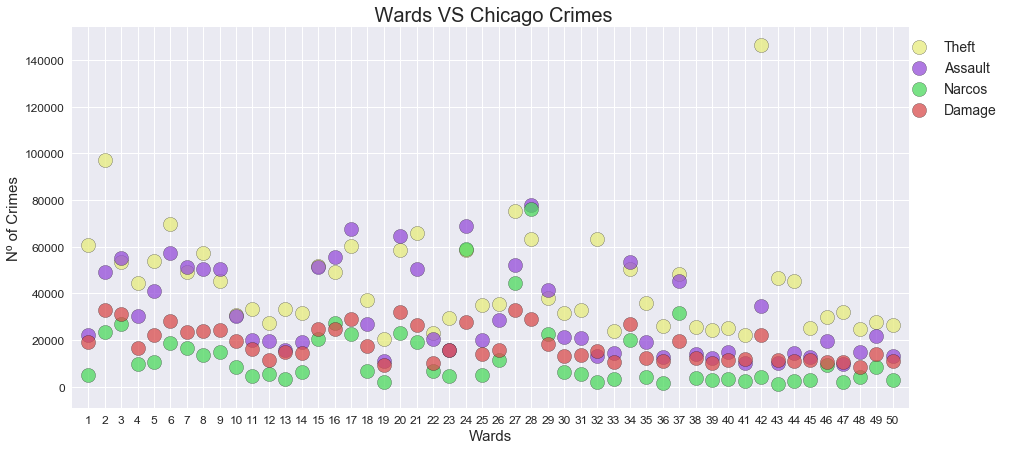

In [53]:
# Filtramos la informacion con aquellas variables que queremos en nuestro nuevo dataframe
theft_crime_wards = dataset.loc[dataset['Primary Type'] == "THEFT & ROBBERY", :]
assault_crime_wards = dataset.loc[dataset['Primary Type'] == "ASSAULT", :]
narco_crime_wards = dataset.loc[dataset['Primary Type'] == "NARCOTICS", :]
damage_crime_wards = dataset.loc[dataset['Primary Type'] == "CRIMINAL DAMAGE", :]

# Agrupamos cada variable por barrio y lo contabilizamos por la "Primary Type"
x_theft_axis = theft_crime_wards.groupby('Ward')['Primary Type'].count()
x_assault_axis = assault_crime_wards.groupby('Ward')['Primary Type'].count()
x_narco_axis = narco_crime_wards.groupby('Ward')['Primary Type'].count()
x_damage_axis = damage_crime_wards.groupby('Ward')['Primary Type'].count()

# Creamos un datsfraame con las siguiente variables
all_crimes_wards = pd.DataFrame({'Xtheft_axis': x_theft_axis.index, "Theft":x_theft_axis, 'Xassault_axis': x_assault_axis.index, 
                                 "Assault": x_assault_axis, 'XNarco_axis':x_narco_axis.index, "Narcos":x_narco_axis,
                                 "Xdam_axis": x_damage_axis.index, "Damage": x_damage_axis  })
 
                                   

plt.figure(figsize=(15,7))

plt.grid(True)

# Creamos un gráfico de puntos con las diferentes tipos de delitos
tef = plt.scatter(all_crimes_wards['Xtheft_axis'] , all_crimes_wards['Theft'], marker="o", facecolors="#E7EC7D",
                  s= 200, edgecolors="black",alpha=0.75)

ass = plt.scatter(all_crimes_wards['Xassault_axis'] , all_crimes_wards['Assault'], marker="o", facecolors="#954DD9", 
                  s= 200 ,edgecolors="black",alpha=0.75)

nar = plt.scatter(all_crimes_wards['XNarco_axis'] , all_crimes_wards['Narcos'], marker="o", facecolors="#4DD95E",
                  s= 200, edgecolors="black",alpha=0.75)

dam = plt.scatter(all_crimes_wards['Xdam_axis'] , all_crimes_wards['Damage'], marker="o", facecolors="#D94D4D",
                  s= 200, edgecolors="black",alpha=0.75)



plt.xticks(np.arange(1,51,1), rotation=85)
plt.xlim(0,51)
plt.title(" Wards VS Chicago Crimes",fontsize=20)
plt.xlabel("Wards",fontsize=15)
plt.ylabel("Nº of Crimes",fontsize=15)
plt.legend((tef,ass,nar,dam),('Theft', 'Assault','Narcos', 'Damage'), scatterpoints=1, 
           bbox_to_anchor = [1.12,1] , ncol=1, fontsize=14)


plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=0)

plt.show()

### Crímenes en las distintas franjas horarias

Tambien hemos considerado relevante, saber en que rangos horarios se producen los crímenes. Esto puede ser muy útil, porque a la hora de asesorar al gobierno de Chicago, de como puede redistribuir los recursos por franjas horarias.

Lo primero que debemos hacer es generar las columnas Fecha, Tiempo y Mes en nuestro dataset

In [61]:
# Convertimos la columna Date (Fecha) a una columna con formato tiempo: 
drugs_crimes_df['Date'] = pd.to_datetime(drugs_crimes_df['Date'])

# Separamos el elemento tiempo de la columna fecha, en una nueva columna:
drugs_crimes_df['Time'] = drugs_crimes_df['Date'].dt.time

# Separamos el elemento mes de la columna fecha en una nueva columna: 
drugs_crimes_df['Month'] = drugs_crimes_df['Date'].dt.month

# Utilizamos una lista para el módulo de calendario y la función de aplicación para convertir el mes en un objeto de tipo string:
drugs_crimes_df['Month'] = drugs_crimes_df['Month'].apply(lambda x: calendar.month_abbr[x])

Ahora lo que queremos es crear un dataset con la información sobre en que horas del día se cometen más crímenes. 

In [65]:
times = drugs_crimes_df['Time'].value_counts()
drugs_crime_times = pd.DataFrame({"No. of Crimes":drugs_crimes_df['Time'].value_counts(), "Time":times.index})

# Change the Time column to a datetime type and format as Hour
drugs_crime_times["Time"] = pd.to_datetime(drugs_crime_times["Time"], format='%X').dt.hour

# Reset Dataframe index
drugs_crime_times = drugs_crime_times.reset_index()
  
# Group dataframe by Time and count of Time
drugs_crime_timess = drugs_crime_times.groupby('Time')['No. of Crimes'].sum()
drugs_crime_time = pd.DataFrame({"No. of Crimes":drugs_crime_timess,
                                "Percentage(%)":(drugs_crime_times.groupby('Time')['No. of Crimes'].sum() /
                                 drugs_crime_timess.sum()) * 100 })

drugs_crime_time

,No. of Crimes,Percentage(%)
Time,,
0,22272,3.45
1,13218,2.05
2,8277,1.28
3,5443,0.84
4,3345,0.52
5,1603,0.25
6,3492,0.54
7,4430,0.69
8,9456,1.47


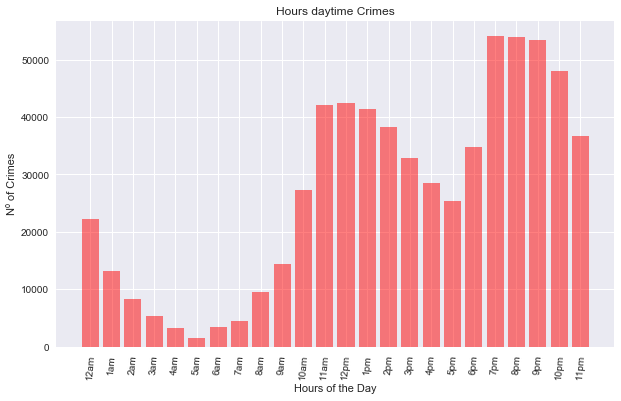

In [70]:
x_axis = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm',
          '1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

y_axis = drugs_crime_time['No. of Crimes']

color = 'yellow'

plt.figure(figsize=(10,6))

plt.bar(x_axis, y_axis , color='red', alpha=0.5, align="center")

plt.title("Hours daytime Crimes")
plt.ylabel("Nº of Crimes")
plt.xlabel("Hours of the Day")
plt.xticks(rotation=85)
plt.grid(True)


# plt.savefig("Chicago_TFM_Imagenes\\Crímenes_Drogas_Horas_en_Chicago.png")

plt.show()